In [1]:
# ! pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np




2025-10-14 05:28:11.646456: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760419691.881529      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760419691.947348      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Change the path if wanto work on the potato diseases or face detection

In [3]:
dataset  = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/potato-diseases-dataset/Potato Diseases data set/PlantVillage",
    shuffle = True,
    image_size = (256,256),
    batch_size = 32


 )

Found 2152 files belonging to 3 classes.


I0000 00:00:1760419708.834134      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1760419708.834923      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [4]:
class_name = dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

# size of image

In [6]:
for image_batch,label_batch in dataset.take(1):
  print(image_batch.shape)
  # print(image_batch[0].numpy())

(32, 256, 256, 3)


In [7]:
for image_size,label in dataset.take(1):
  print(image_size)

tf.Tensor(
[[[[181. 161. 160.]
   [189. 169. 168.]
   [183. 163. 162.]
   ...
   [160. 140. 141.]
   [133. 113. 114.]
   [163. 143. 144.]]

  [[177. 157. 156.]
   [181. 161. 160.]
   [188. 168. 167.]
   ...
   [157. 137. 138.]
   [158. 138. 139.]
   [146. 126. 127.]]

  [[188. 168. 167.]
   [182. 162. 161.]
   [198. 178. 177.]
   ...
   [152. 132. 133.]
   [134. 114. 115.]
   [122. 102. 103.]]

  ...

  [[135. 104. 101.]
   [117.  86.  83.]
   [134. 103. 100.]
   ...
   [120.  90.  90.]
   [136. 106. 106.]
   [114.  84.  84.]]

  [[144. 113. 110.]
   [150. 119. 116.]
   [133. 102.  99.]
   ...
   [119.  89.  89.]
   [143. 113. 113.]
   [124.  94.  94.]]

  [[133. 102.  99.]
   [133. 102.  99.]
   [126.  95.  92.]
   ...
   [119.  89.  89.]
   [142. 112. 112.]
   [130. 100. 100.]]]


 [[[153. 140. 147.]
   [153. 140. 147.]
   [152. 139. 146.]
   ...
   [149. 136. 145.]
   [148. 135. 144.]
   [145. 132. 141.]]

  [[153. 140. 147.]
   [151. 138. 145.]
   [149. 136. 143.]
   ...
   [147. 1

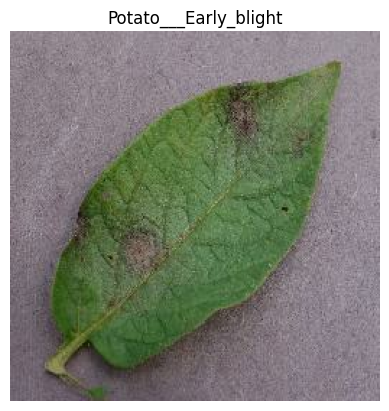

In [8]:
for image_size,label in dataset.take(1):
 plt.imshow(image_batch[9].numpy().astype("uint8"))
 plt.title(class_name[label_batch[0]])
 plt.axis("off")

# train test model

In [9]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

# train

In [10]:
train_ds=dataset.take(54)
len(train_ds)

54

# test

In [11]:
test_ds = dataset.skip(54)
len(test_ds)
test_ds = test_ds.take(8)
len(test_ds)

8

# validation

In [12]:
val_size = 0.1
len(dataset)*val_size
val_ds = test_ds.take(6)
len(val_ds)

6

In [13]:
print(len(train_ds))
print(len(test_ds))
print(len(val_ds))

54
8
6


# shuffle

In [14]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [15]:
IMAGE_SIZE = 256
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
]
)

# Data Augementation

In [16]:
data_augmnet = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
]
)

In [17]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

In [18]:
model = models.Sequential([
    resize_and_rescale,
    data_augmnet,
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes,activation = 'softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.build(input_shape = input_shape)

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 516128)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │    33,032,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,033,347 (126.01 MB)

 Trainable params: 33,033,347 (126.01 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [22]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50


I0000 00:00:1760419719.343807      68 cuda_dnn.cc:529] Loaded cuDNN version 90300


54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.4981 - loss: 24.8242 - val_accuracy: 0.8021 - val_loss: 0.6212
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7956 - loss: 0.5798 - val_accuracy: 0.8021 - val_loss: 0.5432
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8395 - loss: 0.4620 - val_accuracy: 0.8281 - val_loss: 0.5391
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8337 - loss: 0.4854 - val_accuracy: 0.8281 - val_loss: 0.4841
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8628 - loss: 0.3876 - val_accuracy: 0.8542 - val_loss: 0.3900
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8825 - loss: 0.3293 - val_accuracy: 0.8594 - val_loss: 0.3287
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8762 - loss: 0.3138 - val_accuracy: 0.7865 - val_loss: 0.5114
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8998 - loss: 0.2720 - val_accuracy: 0.8490 - val_loss: 

In [23]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9213 - loss: 0.2321


In [24]:
scores

[0.25871869921684265, 0.9140625]

In [25]:
history.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

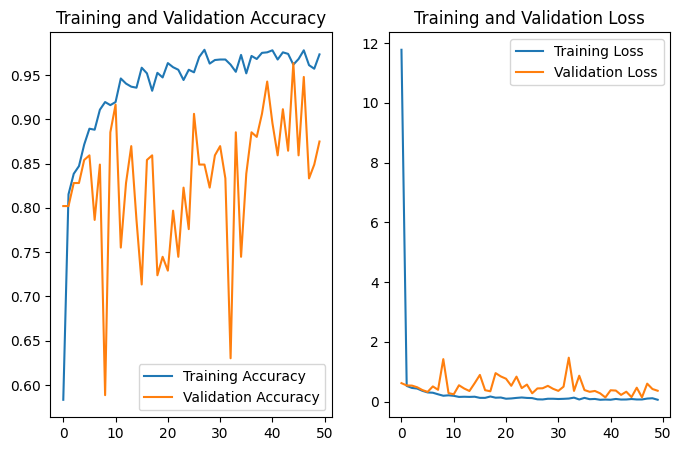

In [27]:

plt.figure(figsize=(8,5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [28]:
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

first image to predict
actual label: Potato___Early_blight


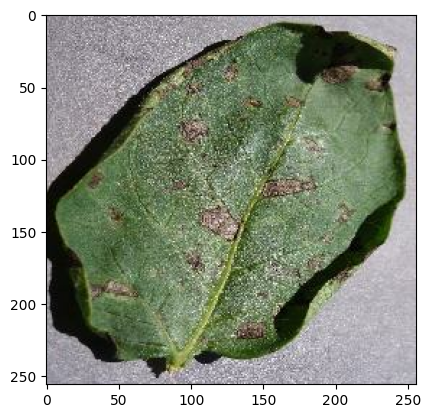

In [29]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict") 
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])
    
    # batch_prediction = model.predict(images_batch)
    # print("predicted label:",class_names[np.argmax(batch_prediction[0])])

First image actua Label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Potato___Late_blight


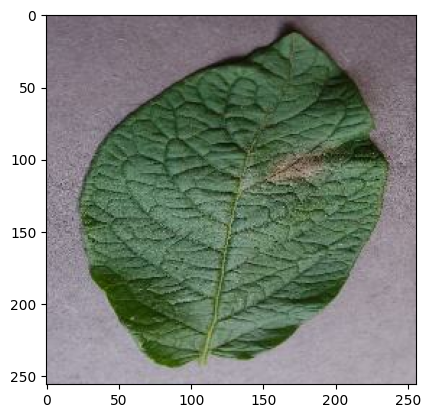

In [30]:
  for image_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()


    plt.imshow(first_image) 
    print("First image actua Label:",class_name[first_label])  
    batch_pre =model.predict(image_batch)
    print(class_name[np.argmax(batch_pre[0])])

In [31]:

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


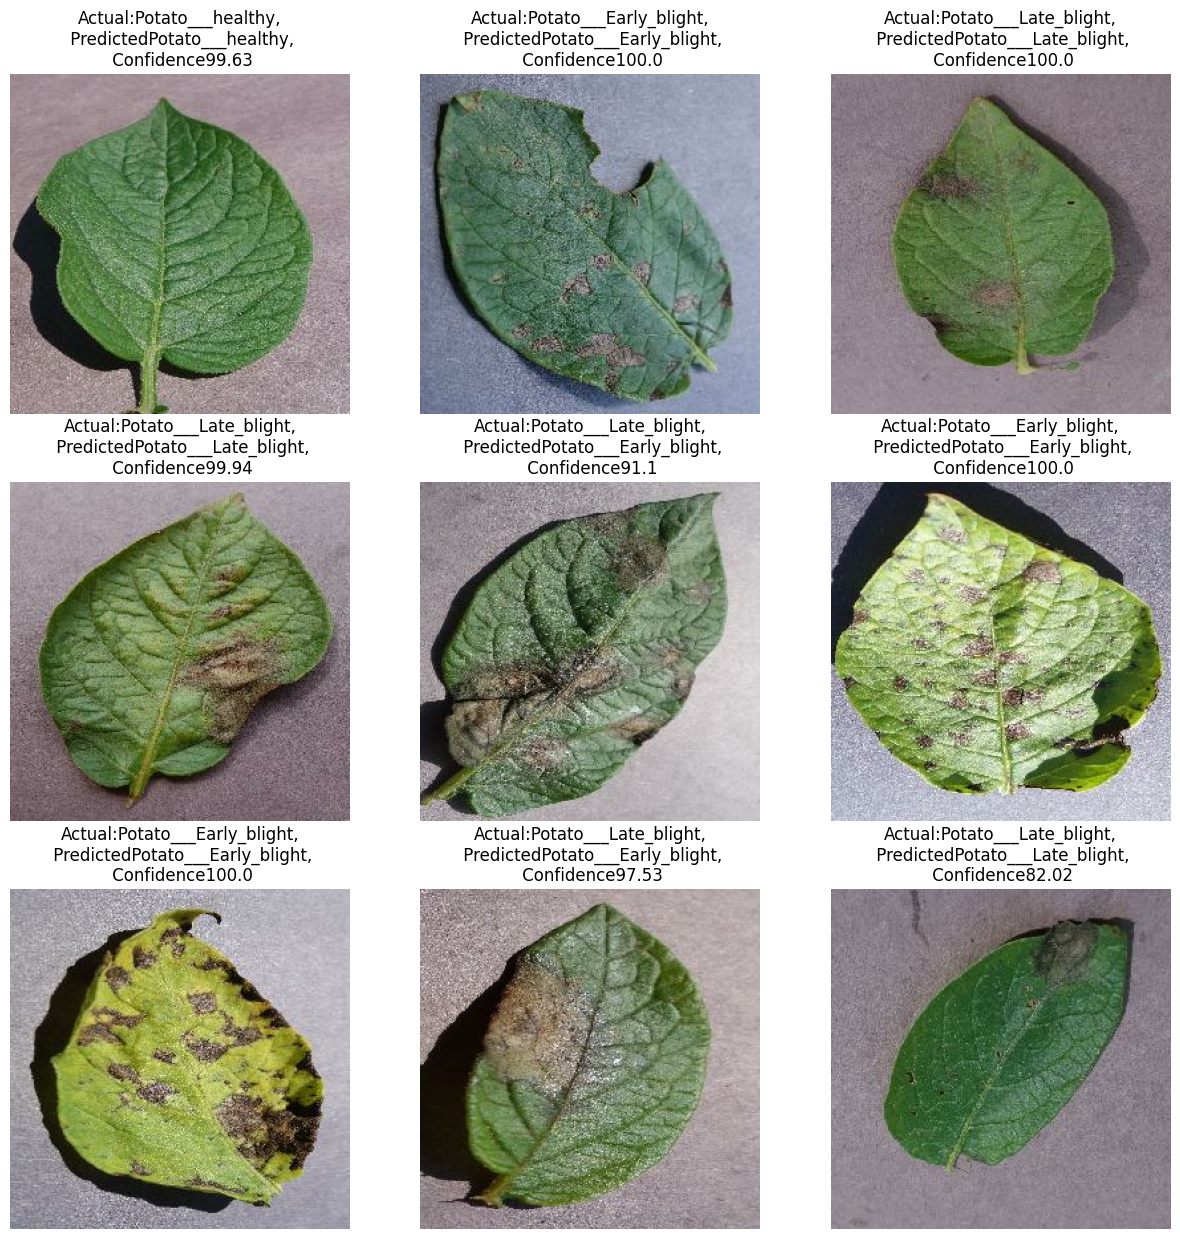

In [32]:
import matplotlib.pyplot as plt

for images, labels in test_ds.take(1):
    plt.figure(figsize=(15, 15))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        pre_class,confidence = predict(model,images[i].numpy())
        actual_class = class_name[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted{pre_class},\n Confidence{confidence}") 
        plt.axis('off')
        

In [33]:
# model_version = 1
# model.save(f"/kaggle/working/Potato_Diseases_model_v{model_version}.keras")


In [34]:
# !ls /kaggle/working


In [35]:
# !zip /kaggle/working/my_model_v1.zip /kaggle/working/my_model.h5


In [36]:
# from IPython.display import FileLink
# FileLink('/kaggle/working/my_model.h5')


In [37]:
# # Save the entire model (architecture + weights + optimizer)
# model.save("my_model.h5")
